# **문제 1**

문제 1
아래 테이블과 같은 csv파일 또는 excel 파일을 PC에서 생성후 Colab 환경으로 불러드리는 절차를 수행한 후 EmpID가 인덱스 컬럼(Column)인 Pandas df를 생성하세요.

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')
# 마운트된 내 드라이브를 확인해보자
!ls

In [ ]:
!ls /content/MyDrive/MyDrive/

In [ ]:
import pandas as pd
df = pd.read_csv("./MyDrive/MyDrive/data1.csv")
print(df)
df1 = df.set_index("EmpID")
df1

# **문제 2**

위에서 생성한 df를 이용하여 아래와 같은 나이(Age)에 대한 히스토그램(Histogram)을 출력해 보세요.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# n = df1.iloc[:, 1]
n = df1['Age']
plt.hist(n, bins=5, linewidth='1', facecolor='blue', edgecolor='black')
plt.title("Age Histogram")
# plt.xticks([25, 30, 35, 40, 45])
plt.xticks(np.arange(25, 46, step=5))
plt.xlabel('age')
plt.ylabel('employee')
plt.show()


# **문제 3**

위에서 생성한 df를 이용하여 아래와 같이 성별(Gender)과 체질량지수(BMI)에 대한 빈도수를 표로 출력해 보세요

In [ ]:
print(df)
group = df.groupby(['Gender', 'BMI']).size()
print(group)

# **문제 4**

BMI를 범주형 변수(Categorical Variable) - [Underweight(저체중)=0, Normal(정상체중)=1, Overweight(과체중) =2, Obesity(비만)=3]- 로 변환하고 그 값을 새로운 컬럼(Column), BMI_index,로 하여 df에 추가하고 확인하세요.

In [ ]:
# import numpy as np
# def bmiindex(data):
#     if data == 'Underweight':
#         result = 0
#     elif data == 'Normal':
#         result = 1
#     elif data == 'Overweight':
#         result = 2
#     else:
#         result = 3
#     return result
df2 = df1.copy()
df0 = df1.copy()

name_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2, 
    'Obesity': 3
}
func = lambda x: name_mapping.get(x, x)
df2['BMI_index'] = df2['BMI'].map(func)
df0['BMI_index'] = df0['BMI'].map(func)
df2['BMI_index']= df2['BMI_index'].astype("category")
print(df2['BMI_index'])
df2

# filter1 = df2['BMI'] == ''
# df2['BMI_index'] = np.where(df2['BMI']=='Underweight', 0, 3)
# df2['BMI_index'] = np.where(df2['BMI']=='Normal', 1, 3)
# df2['BMI_index'] = np.where(df2['BMI']=='Overweight', 2, 3)

# df2

In [ ]:
bmi = pd.Categorical(df['BMI'], ordered=True, categories=['Underweight', 'Normal', 'Overweight','Obesity'])
print(bmi.codes)
df['BMI_index'] = bmi.codes
df

# **문제 5**

남녀 그룹별로 Age, Sales,BMI_index에 대한 평균, 표준편차, 최대치, 최소치 등을 계산하세요.

In [ ]:
# aggregate 사용
print(df.groupby(["Gender"]).aggregate([np.average, np.std, max, min]).T)
print()
# describe 사용
print(df.groupby(['Gender']).describe().T)
print()
gender = 'MF'
for g in gender:
  print(df[df.Gender==g].describe())

# **문제 6**

조사표본 전체 및 남녀 그룹별로 Age와 Sales 사이에 상관관계(Correlation)가 있는지 조사하세요.

In [ ]:
print(df)
corr = df.corr(method='pearson')
corr

In [ ]:
df2 = df[['Gender', 'Age', 'Sales']]
print(df2.corr())
print(df2.groupby(['Gender']).corr())

# **문제 7**

문제 6서 사용된 데이터프레임에서 (1) 무작위로 서로 다른 5개의 샘플을 추출하고 (2) Gender를 여자는 0, 남자는 1로 범주형 데이터로 변환한 후 (3) 데이터프레임을 numpy array로 변환하는 코드를 작성하세요

In [ ]:
gender_mapping = {
    'F': 0,
    'M': 1
}
func = lambda x: gender_mapping.get(x, x)

df3 = df2.sample(n = 5, replace=False)
df3['Gender'] = df3['Gender'].map(func)
df3['Gender']= df3['Gender'].astype("category")
print(df3['Gender'])
print(df3)
# numpy 배열로 변환
df_narray = df3.values
print(df_narray)
type(df_narray)

In [ ]:
df3 = df2.sample(n = 5, replace=False)
print(df3)
df_gender = df3['Gender'].astype('category').values.codes
print(df_gender)
df3.Gender = df_gender
print(df3)
np_data = df3.values
print(np_data)

In [ ]:
# 행의 갯수 확인
# print(df2)
# print(len(df2))
# 0~ len(df2)까지 5단위로, 중복없이 랜덤값 추출
idx = np.random.choice(len(df2), 5, replace=False)
print(idx)

df3 = df2.loc[idx]
df_gender = df3['Gender'].astype('category').values.codes
df3.Gender = df_gender
print(df3)
np_data = df3.values
print(np_data)

# **문제 8**

다음 연산을 수행하세요

$A\cdot B$<br>
$A^3$<br>
$A^2 - 2A +3$<br>
역행렬(Inverse Matrix) $A^{-1}$<br>
행렬식(Matrix Determinant) $|A|$<br>
대각합(Trace): tr(A)<br>

In [ ]:
import numpy as np
from numpy import *
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
B = np.matrix([[1, 0, 1],
               [1, 1, 1],
               [0, 0, 1]])

In [ ]:
# A * B
np.dot(A, B)

In [ ]:
# A **3
A ** 3

In [ ]:
# $A^2 - 2A +3$
(A ** 2) - (2 * A) + 3

In [ ]:
# A의 역행렬
linalg.inv(A)

In [ ]:
# A의 행렬식
linalg.det(A)

In [ ]:
# A의 대각행렬의 합
trace(A)

# **문제 9**

선형 연립방정식은 아래와 같이 행렬을 이용하여 표현할 수 있다.<br>
(1) numpy를 이용하여 해를 구하세요. (2) 해가 맞는지 확인하는 코드를 작성하세요

$$Ax=b$$


$$
A = \begin{pmatrix}
8 & 3 & -2\\
-4 & 7 & 5\\
3 & 4 & -12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
9\\
15\\
35 
\end{pmatrix}
$$

In [ ]:
a = np.array([[8, 3, -2],
              [-4, 7, 5],
              [3, 4, -12]])

# b = np.array([9, 15, 35])
b = np.matrix([9, 15, 35]).transpose()
print(a.shape, b.shape)

print()
# solve로 푸는방법
solve = np.linalg.solve(a, b)
print('x : ', solve)

print()
# 역행렬로 푸는방법
a_ = np.linalg.inv(a)
prod = np.dot(a_, b)
print('x : ', prod)

# 해가 맞는지 확인 a * x = b
print(np.dot(a, solve))
print()
np.allclose(a.dot(solve), b, atol=1e-10)

# **문제 10**

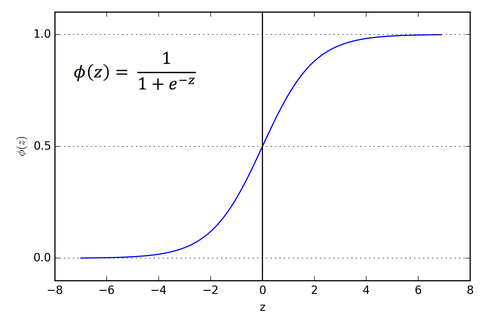

# **문제 10.1**

입력 x= np.array([1,-3,3, 0, -0.5])가 주어질때 sigmoid 함수값을 계산하는 루틴을 작성하세요.

In [ ]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

# 소수점 두번째 자리까지 출력
np.set_printoptions(precision=2, suppress=True)

x = np.array([1,-3,3, 0, -0.5])
x_sigmoid = sigmoid(x)
print(x_sigmoid)

# **문제 10.2**

x = np.arange(-10,10,0.1)이 주어졌을때 시그모이드 함수 그래프를 그려보세요.

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
x_sigmoid = sigmoid(x)
plt.plot(x, x_sigmoid)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Activation Function');

# **문제 11**

MNIST Data
1998년에 만들어진 필기체 손글씨 숫자(0~9) 데이터셋
60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지로 구성
각 숫자이미지는 28x28 크기의 흑백(grayscale) 이미지

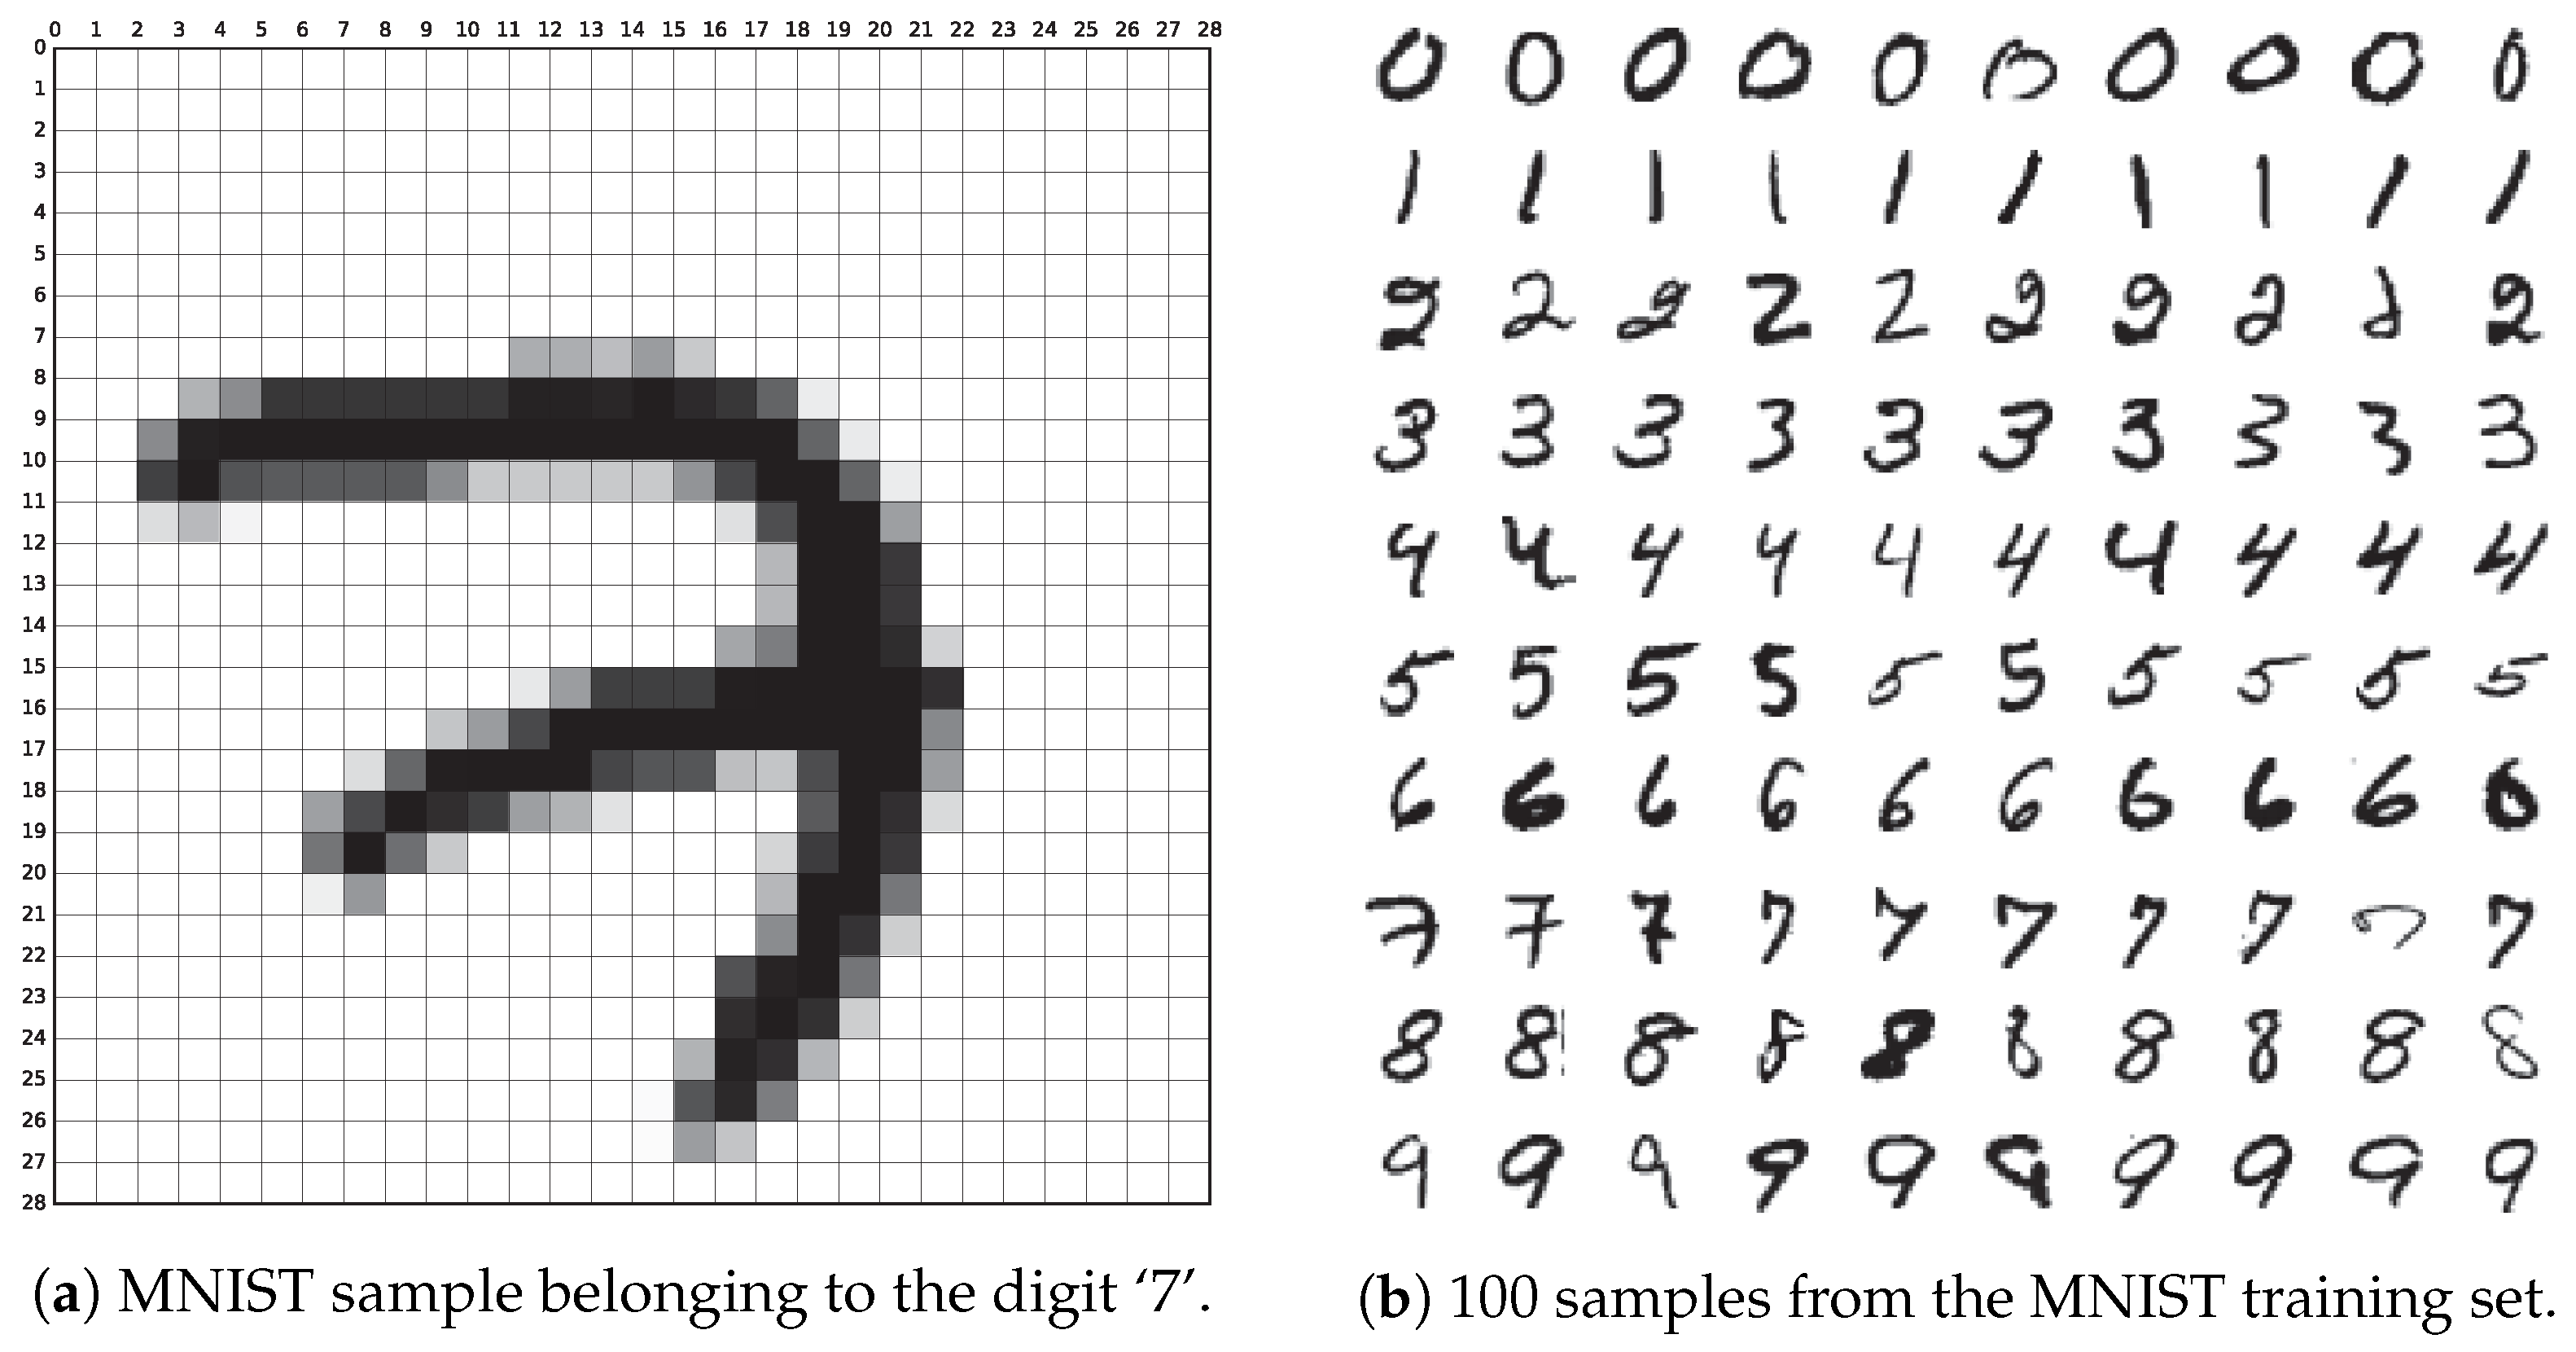

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Download and load the data
(x_train, y_train),(x_test,y_test)=mnist.load_data()

print('x_train: ' + str(x_train.shape)) # 훈련 데이터
print('y_train: ' + str(y_train.shape)) # 훈련 데이터 정답
print('x_test:  '  + str(x_test.shape)) # 테스트 데이터
print('y_test:  '  + str(y_test.shape)) # 테스트 데이터 정답

print('\n')
print(type(x_train), type(y_train))
print('\n')
print(y_train[0:5])

# **문제 11_1**

임의의 훈련용 데이터(x_train[i])가 어떤 방식으로 저장되어 있는지, 무슨 숫자인지 파악할 수 있는 방법을 생각해 보세요.

즉 어떻게 하면 가장 단순하게 특정 이미지 x_train[i]가 무슨 숫자인 확인할 수 있을까요?

In [ ]:
from PIL import Image
import sys
# 0~255.0 사이의 값을 갖는 픽셀값들을 0~1.0 사이의 값을 갖도록 변환
# x_train = x_train/255.0
img = x_train[0]
label = x_train[0]

# 단순히 x_train의 그래프를 그려보면?
plt.imshow(x_train[0],cmap=plt.cm.binary) #[1]은 x_train의 2번째 이미지 plt.show()
plt.show()

# 저장된 데이터화 정답데이터와 비교하여 무슨숫자인지 확인할 수 있지 않을까요?
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')

In [ ]:
# 정답풀이
np.set_printoptions(linewidth=300, precision=2)
# 0 ~ train의 행(60000) 까지의 수중 1개
index = np.random.randint(0, x_train.shape[0])
# print(x_train.shape[0])

# x_train , y_train 비교하면 확인가능
print('True label : ', y_train[index])
print(x_train[index])

# **문제 11_2**


문제 11.2
y_train은 60000개의 숫자이미지의 정답으로 이루어진 백터이다. 이 백터안에 각 숫자가 몇개씩 들어가 있는지를 확인하여 각 숫자의 빈도수 분포를 막대그래프(bar chart)로 출력하는 코드를 만들어 보세요.

In [ ]:
# 정답 풀이 1

# 고유한 값의 갯수를 retrun
unique, counts = np.unique(y_train, return_counts=True)
# 고유한값과 갯수를 딕셔너리 자료형으로 만듬
y_train_dist = dict(zip(unique, counts))
print('Train labels : ', y_train_dist)
plt.bar(y_train_dist.keys(), y_train_dist.values(), color='g');

In [ ]:
# 정답 풀이 2
train_label = pd.DataFrame(y_train, columns=['label'])
print(train_label)
print('###########################')
df4 = train_label.groupby('label').size()
print(df4)
df4.plot.bar()

# **문제 11_3**

훈련용 데이터에서 아래와 같이 임의로 25개의 이미지를 출력하는 코드를 작성해 보세요.

In [ ]:
# 정답 풀이

# 60000에서 25개의 숫자를 랜덤으로 추출 (중복없이)
idx = np.random.choice(len(x_train), 25, replace=False)
print(idx)
print('\n')

# subplot 생성
plt.figure(figsize=(10, 10)) # 가로 10인치, 세로 10인치
for i in np.arange(0, 25): # 0 ~ 24
    plt.subplot(5, 5, i + 1) # 5행, 5열, i+1번째 그래프 
    image = x_train[idx[i]]
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(y_train[idx[i]]))
    plt.tight_layout()
    plt.axis('off')



# **문제 11_4**

테스트 데이터에서 정답이 i(i=0,1,2,,,,9)인 25개의 이미지를 무작위로 출력하는 함수를 만들고 작동하는지 함수를 실행하여 보세요.

예를 들면, 테스트셋에 포함된 10,000개의 이미지중에서 특정 숫자(예를 들면 5)인 이미지를 무작위로 25개 뽑아내어 출력하는 코드를 작성하라는 문제입니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def show_digit(i):
    # where 조건에 맞는 인덱스 반환
    test_filter = np.where((y_test == i))
    test_images = x_test[test_filter]
    # x_test는 테스트데이터, y_test는 정답데이터
    print(test_images.shape) # 주어진값 i와 같은값을 가진 데이터의 인덱스

    idx = np.random.choice(len(test_images), 25, replace=False)
    print(idx)

    # 그래프 생성
    plt.figure(figsize=(10, 10))
    for i in np.arange(0, 25):
        plt.subplot(5, 5, i + 1)
        image = test_images[idx[i]]
        plt.imshow(image, cmap='gray')
        plt.tight_layout()
        # 눈금없애기
        plt.axis('off')
        

show_digit(7)